# Malware Classification

**Instructions:**

Suppose your company is struggling with a series of computer virus attacks for the past several months. The viruses were grouped into a few types with some effort. However, it takes a long time to sort out what kind of virus it is when been hit with. Thus, as a senior IT department member, you undertook a project to classify the virus as quickly as possible. You've been given a dataset of the features that may be handy (or not), and  also the associated virus type (target variable). 

You are supposed to try different classification methods and apply best practices we have seen in the lectures such as grid search, cross validation, regularization etc. To increase your grade you can add more elaboration such as using ensembling or exploiting feature selection/extraction techniques.


In [1]:
# Libraries for data processing and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score



In [2]:
# Read the data
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
0,3.0,3.0,689.0,18.000000,6.0,890.0,6.000000,39.0,17.000000,88.0,...,-208196.847822,149454.443336,330552.774213,133907.410063,44038.800343,55156.067737,-77588.974897,171979.000000,162674.0,2
1,3.0,3.0,583.0,15.000000,5.0,1574.0,8640.382774,6.0,7.000000,30.0,...,36209.864030,221318.549792,-1568.194718,22651.037591,-144906.975987,-33489.566102,157701.356695,7702.000000,6551.0,8
2,3.0,4.0,2796.0,15.000000,5.0,625.0,5.000000,58.0,11.000000,152.0,...,88398.670923,66550.556919,5404.362294,13947.925003,-48559.885445,257023.562444,-204889.973046,151324.169975,12946.0,6
3,3.0,3.0,373.0,2726.071722,9.0,615.0,9.000000,16.0,98583.277889,34.0,...,-157101.258148,-60336.395075,157629.928962,117458.409503,62076.273381,98733.489947,-51461.636374,122247.000000,98621.0,4
4,3.0,3.0,77.0,12.000000,4.0,66.0,91945.635853,3.0,0.000000,5.0,...,32595.648968,-228909.737896,-87033.363460,131606.196188,-118625.690367,89326.297602,-84991.427204,15501.000000,11864.0,1


In [4]:
# X are the columns with features, y is the target variable (virus type)
X = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1])
print(type(X.data))

<class 'memoryview'>


In [5]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Logistic Regression

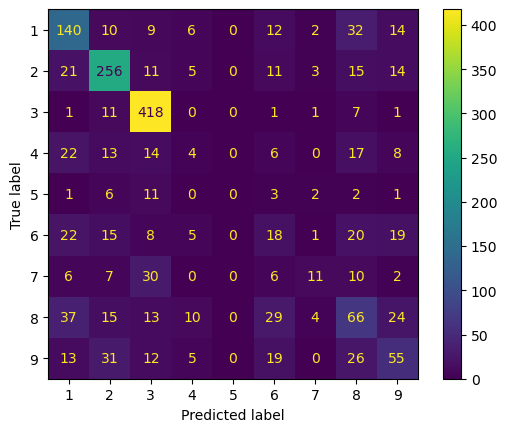

In [6]:
from sklearn.linear_model import LogisticRegression
lg_reg = modeling_pipeline = Pipeline([('scaling', StandardScaler()), ('model', LogisticRegression(solver='liblinear'))])
# We find the best hyperparameters with GridSearchCV
param_grid = [{'model__C': [0.01, 0.1, 1, 10, 100, 1000]}]
lg_results = GridSearchCV(estimator = lg_reg, param_grid = param_grid, scoring = 'accuracy', refit = True, cv = 5)
lg_results = lg_results.fit(X_train, y_train)
# Plot and display the confusion matrix
ConfusionMatrixDisplay.from_estimator(lg_results, X_test, y_test)
plt.show()

In [7]:
# Finding the best estimator
lg_results.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', LogisticRegression(C=0.01, solver='liblinear'))])

In [8]:
# We get the predictions and print the metrics
y_pred = lg_results.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n]",conf_mat)
print("\n Accuracy : ",accuracy_score(y_test, y_pred))
print("\n Classification Report \n", classification_report(y_test, y_pred))

Confusion Matrix 
] [[140  10   9   6   0  12   2  32  14]
 [ 21 256  11   5   0  11   3  15  14]
 [  1  11 418   0   0   1   1   7   1]
 [ 22  13  14   4   0   6   0  17   8]
 [  1   6  11   0   0   3   2   2   1]
 [ 22  15   8   5   0  18   1  20  19]
 [  6   7  30   0   0   6  11  10   2]
 [ 37  15  13  10   0  29   4  66  24]
 [ 13  31  12   5   0  19   0  26  55]]

 Accuracy :  0.5866666666666667

 Classification Report 
               precision    recall  f1-score   support

           1       0.53      0.62      0.57       225
           2       0.70      0.76      0.73       336
           3       0.79      0.95      0.87       440
           4       0.11      0.05      0.07        84
           5       0.00      0.00      0.00        26
           6       0.17      0.17      0.17       108
           7       0.46      0.15      0.23        72
           8       0.34      0.33      0.34       198
           9       0.40      0.34      0.37       161

    accuracy               

/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machine

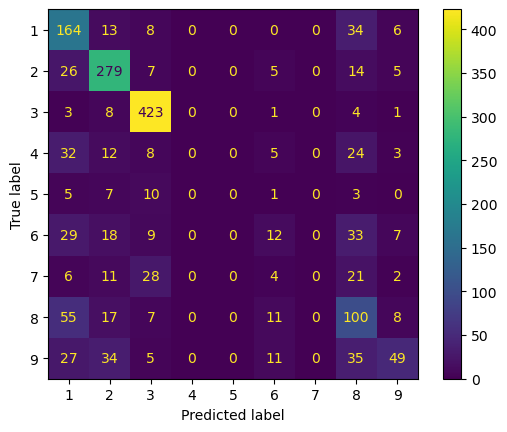

In [9]:
from sklearn.svm import SVC
svm_m = modeling_pipeline = Pipeline([('scaling', StandardScaler()), ('model', SVC())])
# We find the best hyperparameters with GridSearchCV
param_grid = [{'model__C': [0.01, 0.1, 1, 10, 100, 1000], 'model__kernel' : ['linear', 'rbf']}]
svm_results = GridSearchCV(estimator = svm_m, param_grid = param_grid, scoring = 'accuracy', refit = True, cv = 5)
svm_results = svm_results.fit(X_train, y_train)
# Plot and display the confusion matrix
ConfusionMatrixDisplay.from_estimator(svm_results, X_test, y_test)
plt.show()

In [10]:
# Finding the best estimator
svm_results.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('model', SVC(C=10))])

In [11]:
# We get the predictions and print the metrics
y_pred = svm_results.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n]",conf_mat)
print("\n Accuracy : ",accuracy_score(y_test, y_pred))
print("\n Classification Report \n", classification_report(y_test, y_pred))

Confusion Matrix 
] [[164  13   8   0   0   0   0  34   6]
 [ 26 279   7   0   0   5   0  14   5]
 [  3   8 423   0   0   1   0   4   1]
 [ 32  12   8   0   0   5   0  24   3]
 [  5   7  10   0   0   1   0   3   0]
 [ 29  18   9   0   0  12   0  33   7]
 [  6  11  28   0   0   4   0  21   2]
 [ 55  17   7   0   0  11   0 100   8]
 [ 27  34   5   0   0  11   0  35  49]]

 Accuracy :  0.6224242424242424

 Classification Report 
               precision    recall  f1-score   support

           1       0.47      0.73      0.57       225
           2       0.70      0.83      0.76       336
           3       0.84      0.96      0.90       440
           4       0.00      0.00      0.00        84
           5       0.00      0.00      0.00        26
           6       0.24      0.11      0.15       108
           7       0.00      0.00      0.00        72
           8       0.37      0.51      0.43       198
           9       0.60      0.30      0.40       161

    accuracy               

/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

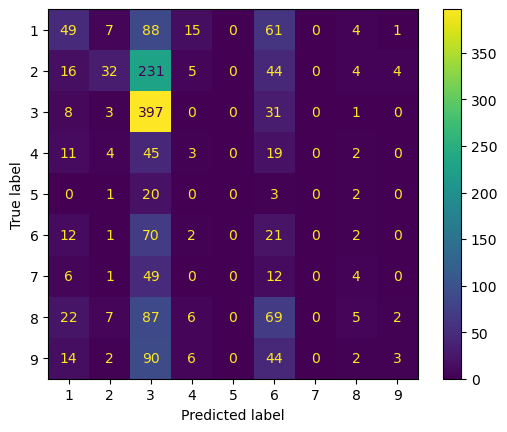

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_m = modeling_pipeline = Pipeline ([('scaling', StandardScaler()), ('model', KNeighborsClassifier())])
# We find the best hyperparameters with GridSearchCV
param_grid = [{'model__n_neighbors': [1, 4, 7, 10, 13], 'model__weights': ['uniform', 'distance']}]
knn_results = GridSearchCV(estimator = knn_m, param_grid = param_grid, scoring = 'accuracy', refit = True, cv = 5)
knn_results = knn_results.fit(X_train, y_train)
# Plot and display the confusion matrix
ConfusionMatrixDisplay.from_estimator(knn_results, X_test, y_test)
plt.show()

In [13]:
# Finding the best estimator
knn_results.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=13))])

In [14]:
# We get the predictions and print the metrics
y_pred = knn_results.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n]",conf_mat)
print("\n Accuracy : ",accuracy_score(y_test, y_pred))
print("\n Classification Report \n", classification_report(y_test, y_pred))

Confusion Matrix 
] [[ 49   7  88  15   0  61   0   4   1]
 [ 16  32 231   5   0  44   0   4   4]
 [  8   3 397   0   0  31   0   1   0]
 [ 11   4  45   3   0  19   0   2   0]
 [  0   1  20   0   0   3   0   2   0]
 [ 12   1  70   2   0  21   0   2   0]
 [  6   1  49   0   0  12   0   4   0]
 [ 22   7  87   6   0  69   0   5   2]
 [ 14   2  90   6   0  44   0   2   3]]

 Accuracy :  0.3090909090909091

 Classification Report 
               precision    recall  f1-score   support

           1       0.36      0.22      0.27       225
           2       0.55      0.10      0.16       336
           3       0.37      0.90      0.52       440
           4       0.08      0.04      0.05        84
           5       0.00      0.00      0.00        26
           6       0.07      0.19      0.10       108
           7       0.00      0.00      0.00        72
           8       0.19      0.03      0.04       198
           9       0.30      0.02      0.04       161

    accuracy               

/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: Unde

# Naive Bayes

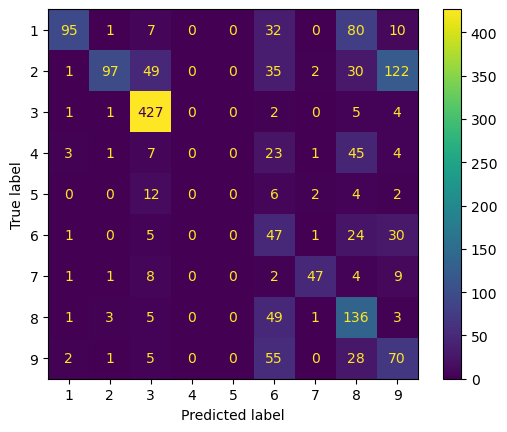

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb_m = GaussianNB()
# We find the best hyperparameters with GridSearchCV
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}
nb_results = GridSearchCV(estimator = gnb_m, param_grid = param_grid, scoring = 'accuracy', refit = True, cv = 5)
nb_results = nb_results.fit(X_train, y_train)
# Plot and display the confusion matrix
ConfusionMatrixDisplay.from_estimator(nb_results, X_test, y_test)
plt.show()

In [16]:
# Finding the best estimator
nb_results.best_estimator_

GaussianNB(var_smoothing=2.310129700083158e-07)

In [17]:
# We get the predictions and print the metrics
y_pred = nb_results.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n]",conf_mat)
print("\n Accuracy : ",accuracy_score(y_test, y_pred))
print("\n Classification Report \n", classification_report(y_test, y_pred))

Confusion Matrix 
] [[ 95   1   7   0   0  32   0  80  10]
 [  1  97  49   0   0  35   2  30 122]
 [  1   1 427   0   0   2   0   5   4]
 [  3   1   7   0   0  23   1  45   4]
 [  0   0  12   0   0   6   2   4   2]
 [  1   0   5   0   0  47   1  24  30]
 [  1   1   8   0   0   2  47   4   9]
 [  1   3   5   0   0  49   1 136   3]
 [  2   1   5   0   0  55   0  28  70]]

 Accuracy :  0.556969696969697

 Classification Report 
               precision    recall  f1-score   support

           1       0.90      0.42      0.58       225
           2       0.92      0.29      0.44       336
           3       0.81      0.97      0.88       440
           4       0.00      0.00      0.00        84
           5       0.00      0.00      0.00        26
           6       0.19      0.44      0.26       108
           7       0.87      0.65      0.75        72
           8       0.38      0.69      0.49       198
           9       0.28      0.43      0.34       161

    accuracy                

/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

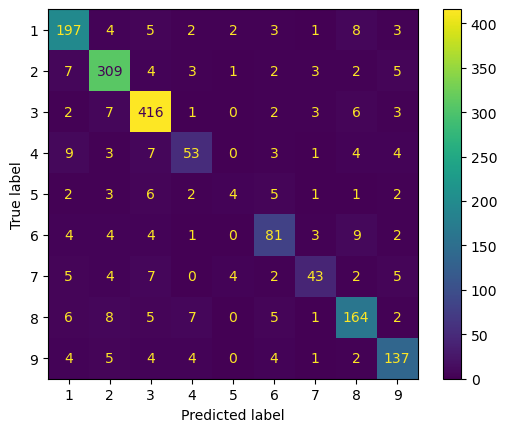

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc_m = modeling_pipeline = Pipeline([('scaling', StandardScaler()),('model', DecisionTreeClassifier())])
# We find the best hyperparameters with GridSearchCV
param_grid = [{'model__criterion':['gini','entropy'],'model__max_depth':[0.01, 0.1, 1, 10, 100, 1000]}]
dtc_results = GridSearchCV(estimator = dtc_m, param_grid=param_grid, scoring='accuracy', refit = True, cv=5)
dtc_results = dtc_results.fit(X_train, y_train)
# Plot and display the confusion matrix
ConfusionMatrixDisplay.from_estimator(dtc_results, X_test, y_test)
plt.show()

In [19]:
# Finding the best estimator
dtc_results.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', DecisionTreeClassifier(max_depth=10))])

In [20]:
# We get the predictions and print the metrics
y_pred = dtc_results.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n]",conf_mat)
print("\n Accuracy : ",accuracy_score(y_test, y_pred))
print("\n Classification Report \n", classification_report(y_test, y_pred))

Confusion Matrix 
] [[197   4   5   2   2   3   1   8   3]
 [  7 309   4   3   1   2   3   2   5]
 [  2   7 416   1   0   2   3   6   3]
 [  9   3   7  53   0   3   1   4   4]
 [  2   3   6   2   4   5   1   1   2]
 [  4   4   4   1   0  81   3   9   2]
 [  5   4   7   0   4   2  43   2   5]
 [  6   8   5   7   0   5   1 164   2]
 [  4   5   4   4   0   4   1   2 137]]

 Accuracy :  0.850909090909091

 Classification Report 
               precision    recall  f1-score   support

           1       0.83      0.88      0.85       225
           2       0.89      0.92      0.90       336
           3       0.91      0.95      0.93       440
           4       0.73      0.63      0.68        84
           5       0.36      0.15      0.22        26
           6       0.76      0.75      0.75       108
           7       0.75      0.60      0.67        72
           8       0.83      0.83      0.83       198
           9       0.84      0.85      0.85       161

    accuracy                

# Random Forest

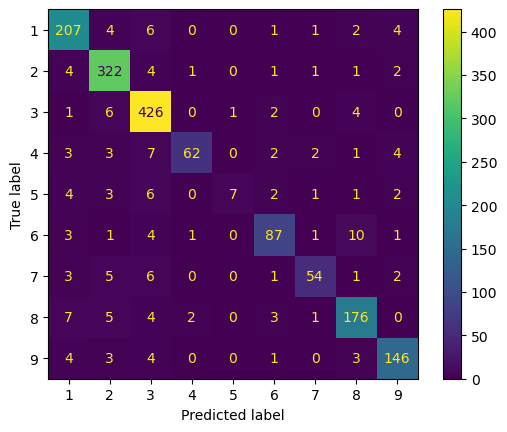

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc_m = RandomForestClassifier()
# We find the best hyperparameters with GridSearchCV
param_grid = [{ 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [0.01, 0.1, 1, 10, 100, 1000],
    'criterion' :['gini', 'entropy']
}]
rfc_results = GridSearchCV(estimator = rfc_m, param_grid=param_grid, scoring='accuracy', refit = True, cv=5)
rfc_results = rfc_results.fit(X_train, y_train)
# Plot and display the confusion matrix
ConfusionMatrixDisplay.from_estimator(rfc_results, X_test, y_test)
plt.show()


In [22]:
# Finding the best estimator
rfc_results.best_estimator_

RandomForestClassifier(max_depth=1000, n_estimators=200)

In [23]:
# We get the predictions and print the metrics
y_pred = rfc_results.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n]",conf_mat)
print("\n Accuracy : ",accuracy_score(y_test, y_pred))
print("\n Classification Report \n", classification_report(y_test, y_pred))

Confusion Matrix 
] [[207   4   6   0   0   1   1   2   4]
 [  4 322   4   1   0   1   1   1   2]
 [  1   6 426   0   1   2   0   4   0]
 [  3   3   7  62   0   2   2   1   4]
 [  4   3   6   0   7   2   1   1   2]
 [  3   1   4   1   0  87   1  10   1]
 [  3   5   6   0   0   1  54   1   2]
 [  7   5   4   2   0   3   1 176   0]
 [  4   3   4   0   0   1   0   3 146]]

 Accuracy :  0.9012121212121212

 Classification Report 
               precision    recall  f1-score   support

           1       0.88      0.92      0.90       225
           2       0.91      0.96      0.94       336
           3       0.91      0.97      0.94       440
           4       0.94      0.74      0.83        84
           5       0.88      0.27      0.41        26
           6       0.87      0.81      0.84       108
           7       0.89      0.75      0.81        72
           8       0.88      0.89      0.89       198
           9       0.91      0.91      0.91       161

    accuracy               